#  *Land-Ocean Temperature Index, ERSSTv5, 1200km smoothing*  Dataset

This is the dataset that we'll be using for this project and the notebook.

# 1. Load in Data & create *ds* (our *xarray dataset*)
This project uses data from the *NASA Goddard Institute for Space Studies* and we are analyzing the *Land-Ocean Temperature Index, ERSSTv5, 1200km smoothing* data to look at surface air temperature anomaly data. This data is an estimate of global surface temperature change. (https://data.giss.nasa.gov/gistemp/) 
1. Download the data from: https://data.giss.nasa.gov/gistemp/
2. Add to the github repo
3. Import all the Python libraries that we will be using on the project:
- xarray
- pandas
- matplotlib
- cartopy
4. Create a *Dataset* from the downloaded netCDF file

In [34]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import cartopy.feature as cfeature
import xarray as xr

ds = xr.open_dataset("C:/Users/iarreola/E484/files/gistemp1200_GHCNv4_ERSSTv5.nc.gz")

ds

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1702, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2021-10-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2021-11-10 10:02:57 by SBBX_to_nc 2.0 - ILAND=1200,...

# 2. Create global temp anomaly panel
The following view provides the temp anomaly where each picture is a **year** 
1. Use the previously created *xarray dataset*, **ds** to clean up the data. First resample the data so that we only grab the yearly frequency & so that we look at the average. Set this equal to *climate*
2. Grab the data variable that we need for the next series of visualizations. The data variable that we're interested is *'tempanomaly'* We want to grab the data variable from the cleaned up *dataset* that we created. Set that equal to **anomaly**
3. Take a look at anomaly and confirm that we've got the data variable that we want & that we are just bringing in data on a yearly basis.
4. Use *matplotlib* to select every year in our dataset, from 1880 to 2021, plot it on a map, and set is so that there are twelve years set per each row in the figure

In [35]:
climate = ds.resample(time='Y').mean()
anomaly = climate['tempanomaly']

anomaly

<xarray.DataArray 'tempanomaly' (time: 142, lat: 90, lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 3.7975    ,  3.7975    ,  3.7975    , ...,  3.7975    ,
          3.7975    ,  3.7975    ],
        [ 3.7975    ,  3.7975    ,  3.7975    , ...,  3.7975    ,
          3.7975    ,  3.7975    ],
        [ 3.7975    ,  3.7975    ,  3.7975    , ...,  3.7975    ,
          3.7975    ,  3.7975    ]],

       [[-1.3089999 , -1.3089999 , -1.3089999 , ..., -1.3089999 ,
         -1.3089999 , -1.3089999 ],
        [-1.3089999 , -1.3089999 , -1.3089999 , ..., -1.3089999 ,
         -1.3089999 , -1.3089999 ],
        [-1.3089999 , -1.3089999 , -1.3089999 , ..., -1.3089999 ,
         -1.3089999 , -1.3089999 ],
        ...,
        [ 3.839     ,  3.839     ,  3.839     , ...,  3.839     ,
          3.839     ,  3.839     ],
        [ 3.839     ,  3.839     ,  3.839     , ...,  3.839     ,
          3.839     ,  3.839     ],
        [ 3.839     ,  3.839     ,  3.839     , ...,  3.839     ,
          3.839     ,  3.839     ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1880-12-31 1881-12-31 ... 2021-12-31
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0

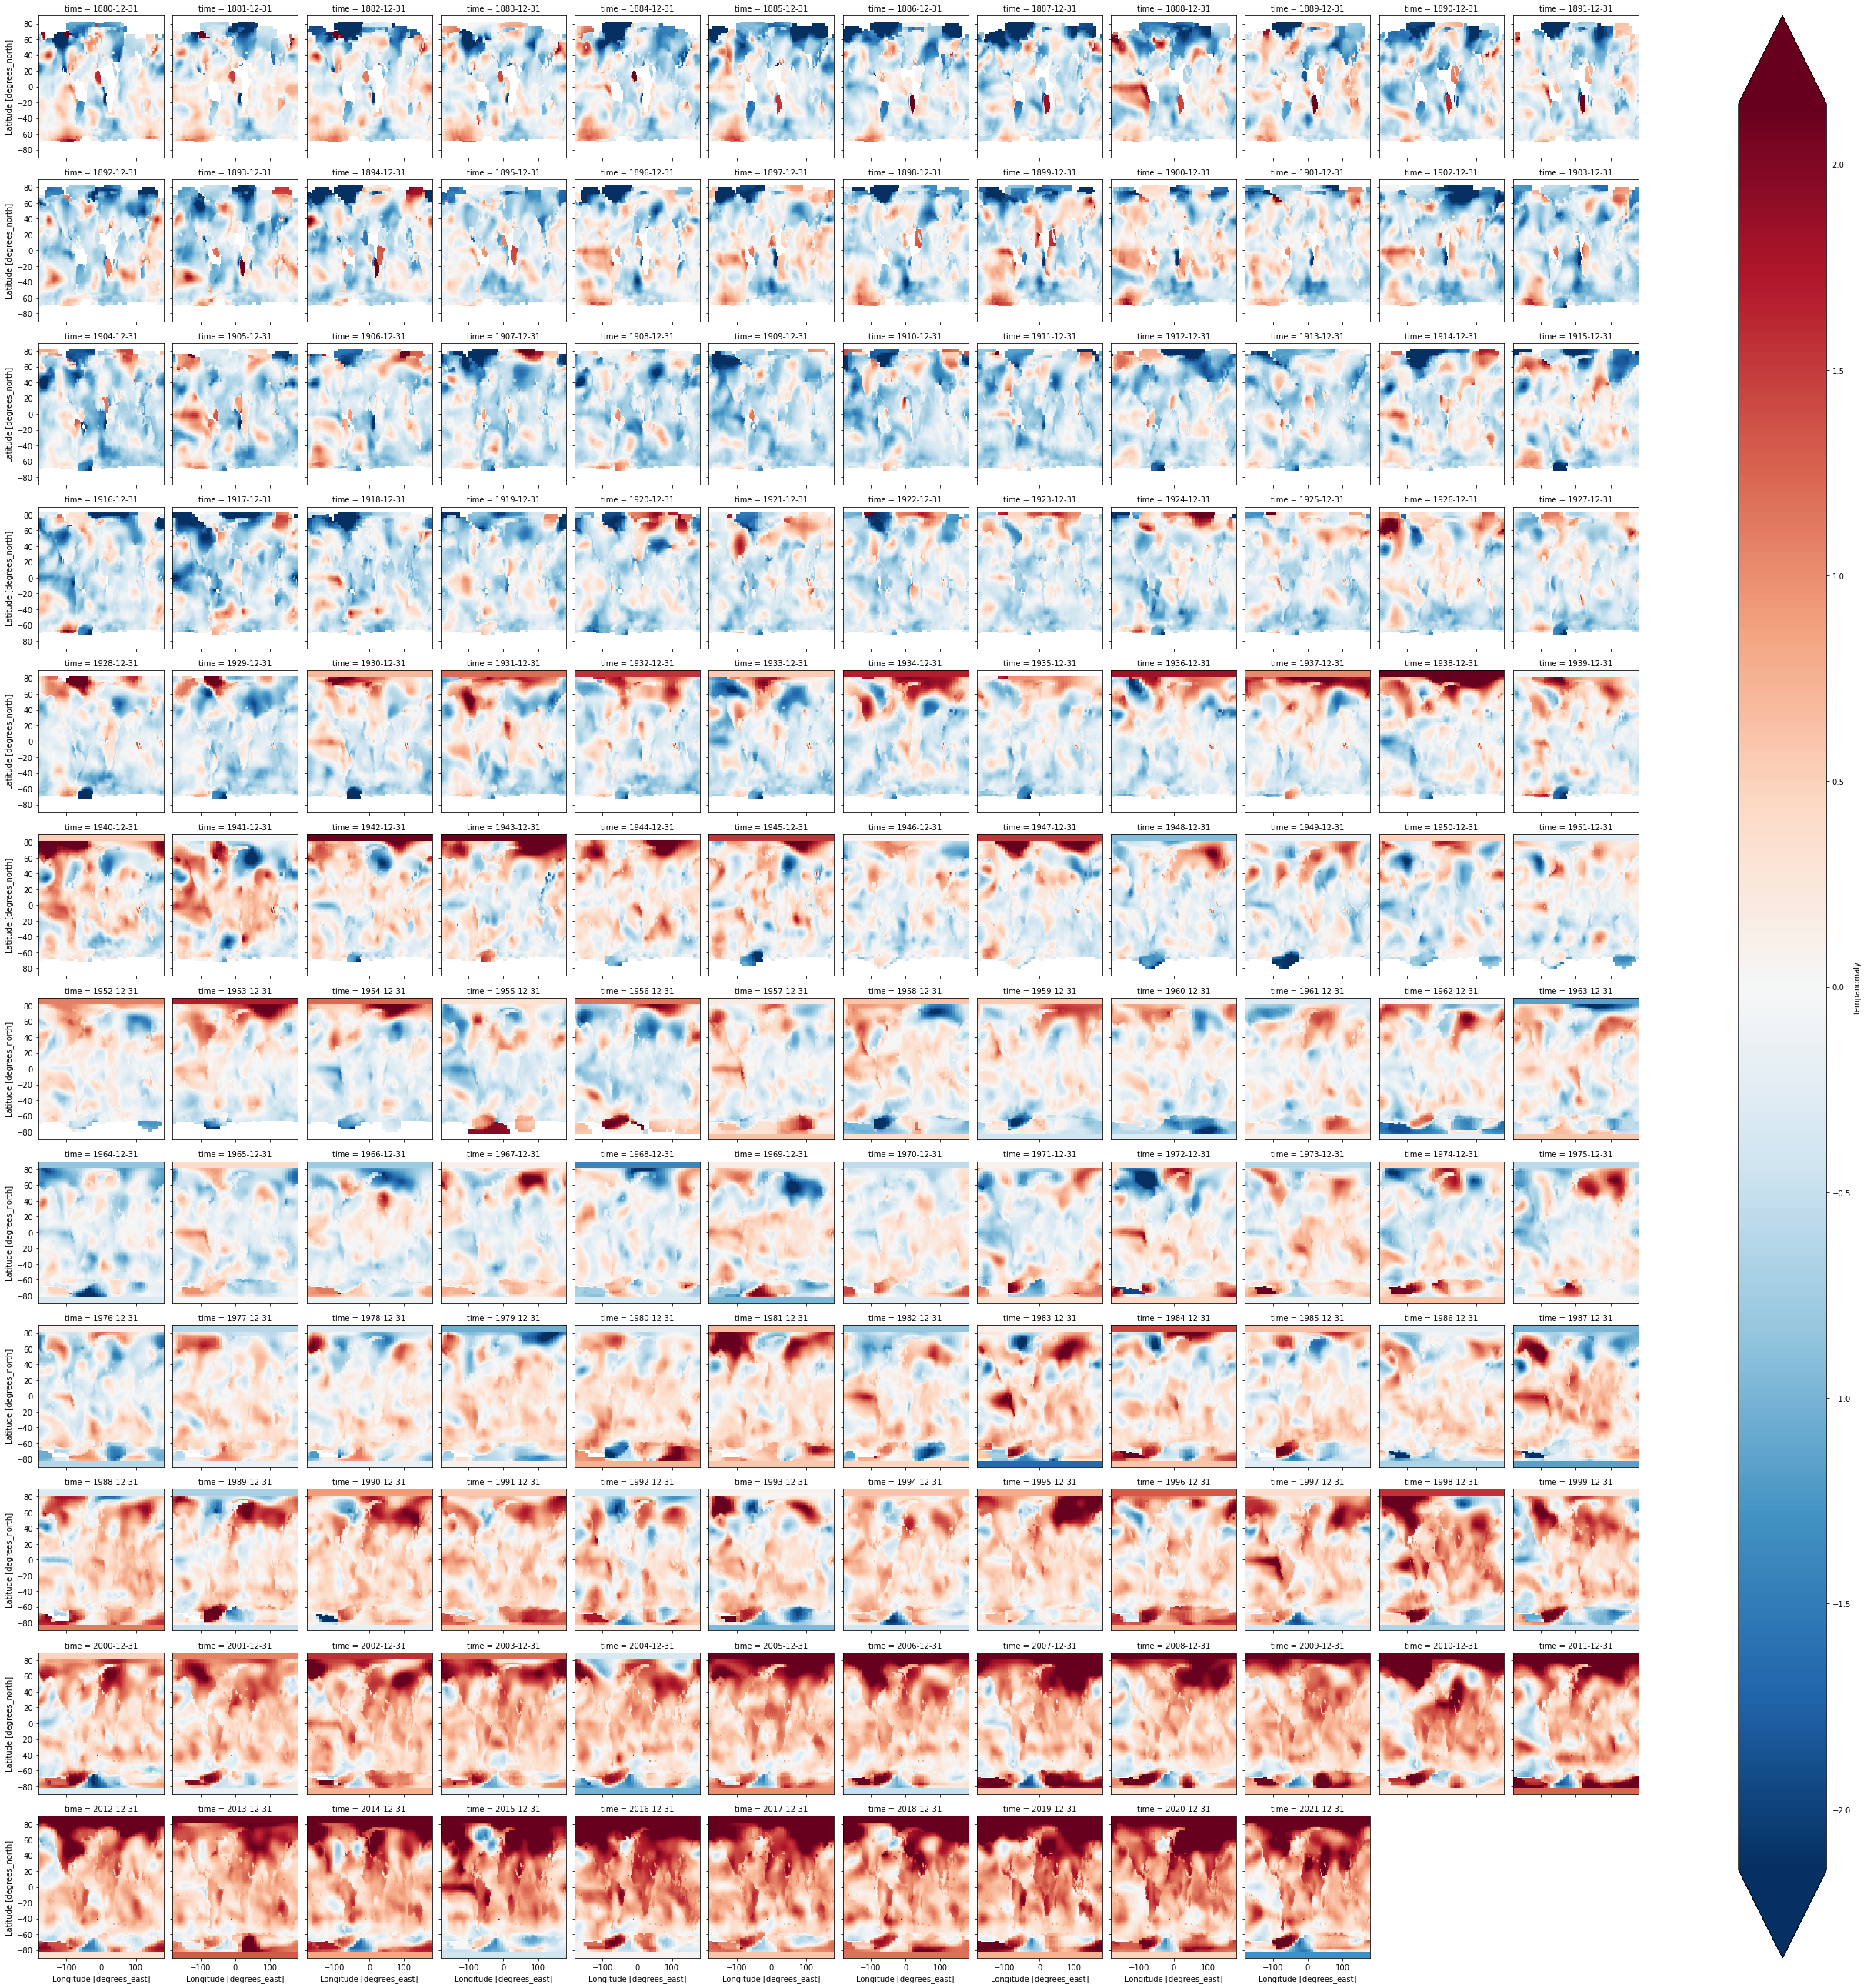

In [67]:
world_figure = anomaly.sel(time=slice("1880", "2021")).plot(col="time", col_wrap=12, robust=True);

# Step 3. Animate Global Temp Anomaly

1. We can use *matplotlib (pyplot as plt)* to create a map for the surface temp anomalies of the globe
2. We can use *ffmpeg* to create an animation out of all the pictures from step 1
3. *"...mp4"* is saved in the repo, which can be used for the presentation

Additional Resources
- [Instructions for installing ffmpeg](https://www.youtube.com/watch?v=r1AtmY-RMyQ&ab_channel=TroubleChute)
- [Source to download here](https://www.gyan.dev/ffmpeg/builds/)
- [Found a Medium article that breaks down what we need](https://towardsdatascience.com/visualizing-climate-change-data-with-python-74ea5bac8756)

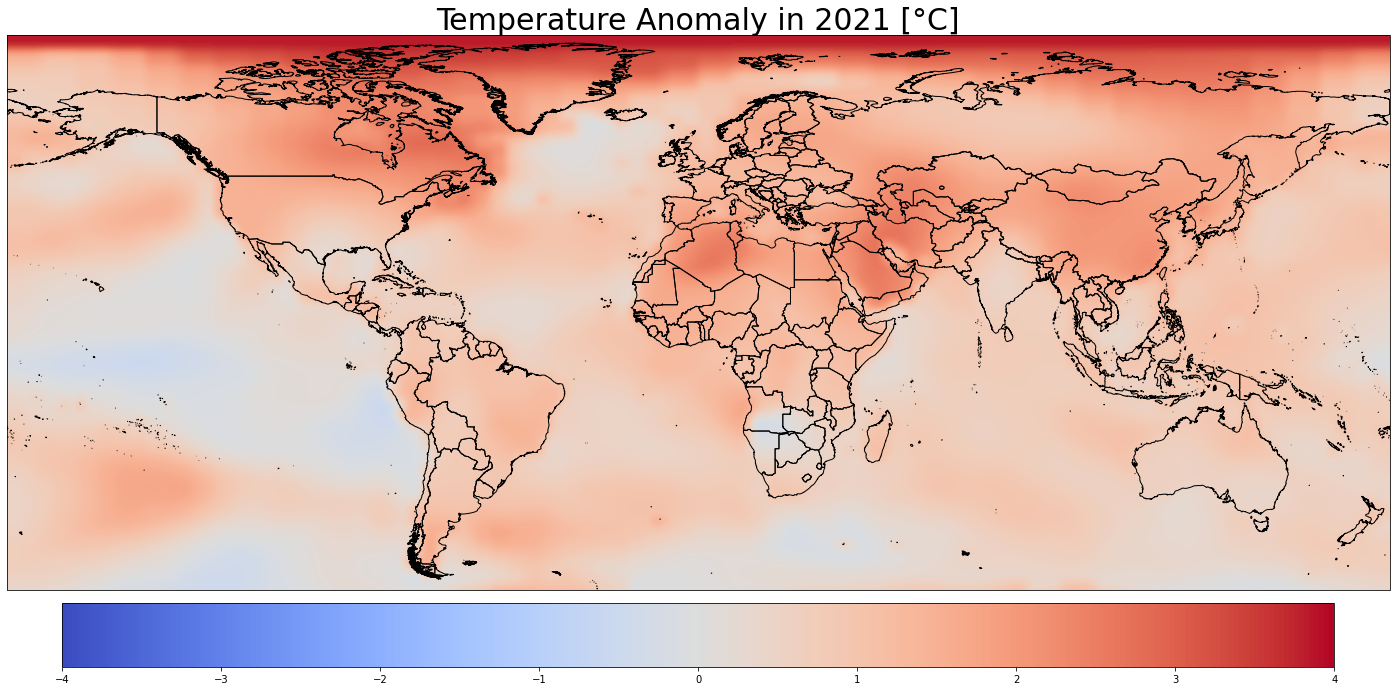

In [3]:
#Downsample the time series to yearly frequency.

climate = ds.resample(time='Y').mean()
anomaly = climate['tempanomaly']

#Creating an animation for 1950-2020 and saving it as an MP4 video.
#Setting the location for the world map
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.048,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0.02, bottom=0.04, right=0.98, top=0.96)
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
              facecolor='none', edgecolor='black')
ax.set_extent([-150, 150, -55, 85])


image = anomaly.isel(time=0).plot.imshow(ax=ax, add_labels=False,
                       vmin=-4, vmax=4, cmap='coolwarm', animated=True,
                       cbar_kwargs=cbar_kwargs, interpolation='bicubic')

def animate(t):
    date =  pd.to_datetime(anomaly.sel(time=t)['time'].values)
    ax.set_title("Temperature Anomaly in " + str(date.year) + " [°C]")
    ax.title.set_fontsize(30)
    image.set_array(anomaly.sel(time=t))
    return image

ani = FuncAnimation(fig, animate, frames=anomaly['time'].values[-141:], blit=False)
ani.save("world_temp_all_years.mp4", fps=2, extra_args=['-vcodec','libx264', '-crf','15', '-preset','veryslow'])


# Step 4: Select the U.S. Region & Output As NetCDF
We can use `sel()` or `isel()` to grab the region
We can use `where()` to select all values within the bounds of interest

1. Create an *xarray dataset* that limits the location to the U.S. with the *slice* & then **resample** that dataset so that the time is set to be per *year* (the original is a monthly timestep) 
2. First plot the selected region to make sure that we're grabbing the right place
3. Save the U.S. dataset as a *netcdf file* to load into Paraview

Additional Resources
- `ax.set_extent` gets modified to select specific regions
- [This gist shows what the various min/max lat/long are for the various countires that may need to be analyzed](https://gist.github.com/graydon/11198540)

In [36]:
anomaly_temp_USA = ds.sel(lat=slice(25, 50), lon=slice(-125, -67))

anomaly_temp_USA = anomaly_temp_USA.resample(time="Y").mean()

anomaly_temp_USA

<xarray.Dataset>
Dimensions:      (time: 142, lat: 13, lon: 30)
Coordinates:
  * time         (time) datetime64[ns] 1880-12-31 1881-12-31 ... 2021-12-31
  * lat          (lat) float32 25.0 27.0 29.0 31.0 33.0 ... 43.0 45.0 47.0 49.0
  * lon          (lon) float32 -125.0 -123.0 -121.0 -119.0 ... -71.0 -69.0 -67.0
Data variables:
    tempanomaly  (time, lat, lon) float32 -0.6975 -0.6742 ... 2.193 2.242

C:\Users\iarreola\Anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\iarreola\Anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\iarreola\Anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


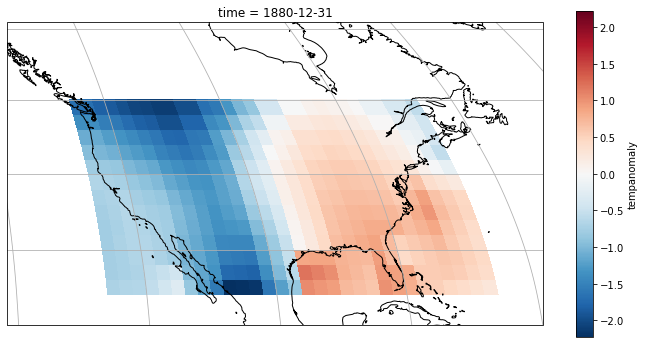

In [37]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.gridlines()
anomaly_temp_USA.tempanomaly.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.5})
ax.set_extent([-135, -60, 20, 55])     

In [11]:
#output the dataset to a netcdf file so that we can load into Paraview

anomaly_temp_USA.to_netcdf("usa_data_year_resample.nc")

# Going from xarray to a geopandas dataframe

## Reference: [Stack Overflow](https://stackoverflow.com/questions/65504116/how-to-convert-a-xarray-dataarray-to-a-geopandas-geodataframe)

1. Import *geopandas*
2. Take the previous netCDF file, the U.S. resampled data, and turn it into a *dataframe*
3. Take the dataframe and turn it into a *geo-dataframe*
4. Insert the time stamps into the geopanda so that it has all the data needed
5. Review the *geo-dataframe* to be sure it has all the data needed
6. Export the *geo-dataframe* into a geoJSON & a shapefile

In [38]:
# Steps 1-3 below

import geopandas as gpd
import xarray as xr

xds = xr.open_dataset('usa_data_year_resample.nc')
xarr = xds['tempanomaly']
df = xarr.to_dataframe().reset_index()

gdf = gpd.GeoDataFrame(
    df.tempanomaly, geometry=gpd.points_from_xy(df.lon,df.lat))

#Review the geo dataframe
gdf

tempanomaly                     geometry
0        -0.697500  POINT (-125.00000 25.00000)
1        -0.674167  POINT (-123.00000 25.00000)
2        -0.652500  POINT (-121.00000 25.00000)
3        -0.551667  POINT (-119.00000 25.00000)
4        -0.418333  POINT (-117.00000 25.00000)
...            ...                          ...
55375     2.134000   POINT (-75.00000 49.00000)
55376     2.134000   POINT (-73.00000 49.00000)
55377     2.193000   POINT (-71.00000 49.00000)
55378     2.193000   POINT (-69.00000 49.00000)
55379     2.242000   POINT (-67.00000 49.00000)

[55380 rows x 2 columns]

In [39]:
# STEP 4
# I want to insert time into the geoPandas & my idea is to simply add it as an additional column in the existing dataframe

df_time = df.time 

df_time

#adding in a new column to the existing geoPandas dataframe for time

gdf['time'] = df_time.dt.year

# STEP 5
#let's see what the geoPandas looks like now that we've added in the time column

gdf

tempanomaly                     geometry  time
0        -0.697500  POINT (-125.00000 25.00000)  1880
1        -0.674167  POINT (-123.00000 25.00000)  1880
2        -0.652500  POINT (-121.00000 25.00000)  1880
3        -0.551667  POINT (-119.00000 25.00000)  1880
4        -0.418333  POINT (-117.00000 25.00000)  1880
...            ...                          ...   ...
55375     2.134000   POINT (-75.00000 49.00000)  2021
55376     2.134000   POINT (-73.00000 49.00000)  2021
55377     2.193000   POINT (-71.00000 49.00000)  2021
55378     2.193000   POINT (-69.00000 49.00000)  2021
55379     2.242000   POINT (-67.00000 49.00000)  2021

[55380 rows x 3 columns]

In [33]:
# Change from geoPandas and write it to a GeoJSON

gdf.to_file("usa_data_resample.geojson", driver='GeoJSON')

In [41]:
# Change from geoPandas to a shapefile

gdf.to_file('usa_data_resample.shp', driver ='ESRI Shapefile') 

### Repeat Step 2-6 from above so that we get the same information for global data

In [84]:
#Step 2 

climate.to_netcdf('global_data_year_resample.nc')

gds = xr.open_dataset('global_data_year_resample.nc')
garr = gds['tempanomaly']
global_df = garr.to_dataframe().reset_index()

global_gdf = gpd.GeoDataFrame(
    global_df.tempanomaly, geometry=gpd.points_from_xy(global_df.lon,global_df.lat))

#Review the geo dataframe
global_gdf

tempanomaly                      geometry
0                NaN  POINT (-179.00000 -89.00000)
1                NaN  POINT (-177.00000 -89.00000)
2                NaN  POINT (-175.00000 -89.00000)
3                NaN  POINT (-173.00000 -89.00000)
4                NaN  POINT (-171.00000 -89.00000)
...              ...                           ...
2300395        3.839    POINT (171.00000 89.00000)
2300396        3.839    POINT (173.00000 89.00000)
2300397        3.839    POINT (175.00000 89.00000)
2300398        3.839    POINT (177.00000 89.00000)
2300399        3.839    POINT (179.00000 89.00000)

[2300400 rows x 2 columns]

In [85]:
# STEP 4
# I want to insert time into the geoPandas & my idea is to simply add it as an additional column in the existing dataframe

global_df_time = global_df.time 

global_df_time

#adding in a new column to the existing geoPandas dataframe for time

global_gdf['time'] = global_df_time.dt.year

# STEP 5
#let's see what the geoPandas looks like now that we've added in the time column

global_gdf

tempanomaly                      geometry  time
0                NaN  POINT (-179.00000 -89.00000)  1880
1                NaN  POINT (-177.00000 -89.00000)  1880
2                NaN  POINT (-175.00000 -89.00000)  1880
3                NaN  POINT (-173.00000 -89.00000)  1880
4                NaN  POINT (-171.00000 -89.00000)  1880
...              ...                           ...   ...
2300395        3.839    POINT (171.00000 89.00000)  2021
2300396        3.839    POINT (173.00000 89.00000)  2021
2300397        3.839    POINT (175.00000 89.00000)  2021
2300398        3.839    POINT (177.00000 89.00000)  2021
2300399        3.839    POINT (179.00000 89.00000)  2021

[2300400 rows x 3 columns]

In [86]:
# Step 6
# Change from geoPandas and write it to a GeoJSON

global_gdf.to_file("global_data_resample.geojson", driver='GeoJSON')


# Change from geoPandas to a shapefile
global_gdf.to_file('global_data_resample.shp', driver ='ESRI Shapefile') 

---
# From xarray into pandas into csv?
`Climate` is the *xarray dataset* that has all the global data. We can use this to output into a usable format, make it easier for analysis.
1. Extract tempanomaly, *the variable*
2. Extract the rest of it -- i.e. Get dimensions (3D): *time*, *latitude*, *longitude*

In [ ]:
#extract the tempanomaly variable

t_anom = climate.variables['tempanomaly']

t_anom

In [96]:
climate

<xarray.Dataset>
Dimensions:      (time: 142, lat: 90, lon: 180)
Coordinates:
  * time         (time) datetime64[ns] 1880-12-31 1881-12-31 ... 2021-12-31
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
Data variables:
    tempanomaly  (time, lat, lon) float32 nan nan nan nan ... 3.839 3.839 3.839

In [ ]:
# Get dimensions (3D): time, latitude, longitude
climate.time, climate.lat, climate.lon = t_anom.get_dims()
time_var = climate.variables[climate.time.name]
times = climate.time(time_var[:], time_var.units)
latitudes = climate.variables[climate.lat.name][:]
longitudes = climate.variables[climate.lon.name][:]

output_dir = './'

In [ ]:
lat_array = xds.to_stacked_array("lat_array",sample_dims=['lat'])
lat_tuple = tuple(lat_array)
lat_tuple

In [46]:
from geopandas import GeoDataFrame
from shapely.geometry import Polygon

---

# Data Analysis on Temp Anomaly Data Set
Going to do all of this inside of Tableau and just create the final visualization from that tool.

(array([3.80000e+02, 9.32000e+02, 3.11380e+04, 1.43201e+05, 1.27370e+04,
        4.79600e+03, 1.57000e+02, 0.00000e+00, 4.00000e+00, 4.00000e+00]),
 array([-2.085108  , -1.4261307 , -0.76715314, -0.10817573,  0.5508017 ,
         1.2097791 ,  1.8687565 ,  2.527734  ,  3.1867115 ,  3.8456888 ,
         4.5046663 ], dtype=float32),
 <BarContainer object of 10 artists>)

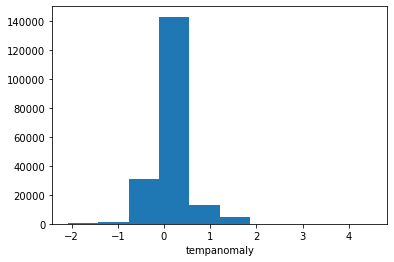

In [52]:
#Taking the average at every point in the dataset
avg_anomaly_month = ds.tempanomaly.groupby('time.month').mean()

avg_anomaly_month.plot()


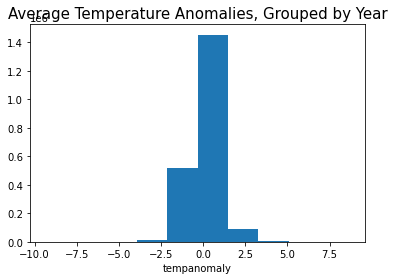

In [62]:
#Taking the average at every point in the dataset
avg_anomaly_year = ds.tempanomaly.groupby('time.year').mean()

year_fig = avg_anomaly_year.plot()

plt.title(
    f'Average Temperature Anomalies, Grouped by Year',
    size=15,
);

In [ ]:
# This is taking the anomaly - average anomaly
# But this doesn't feel like it should be done? Because I think the anomaly is already an average, so it'd be an average of an average...which feels wrong
# But going to see what it looks like

avg_anomalyz = month - month.mean(dim='time')
avg_anomalyz

# Next I'm looking at the mean global anomaly in time by computing mean & specifying both lat and lon dimensions in the dim argument to mean:

unweighted_mean_global_anom = avg_anomalyz.mean(dim=['lat', 'lon'])
unweighted_mean_global_anom.plot();